## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import Dropout

def build_mlp(input_shape, ouput_unit=10, num_neurons=[512, 256, 128], drop_rate=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i,n in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n , activation='relu', name='hidden_layer'+str(i+1)) (input_layer)
        else:
            x = keras.layers.Dense(units=n , activation='relu', name='hidden_layer'+str(i+1)) (x)
            x = Dropout(drop_rate)(x)
            
    out = keras.layers.Dense(units=ouput_unit, activation='softmax', name='output') (x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
batch_size=256
epochs=50
learning_rate=0.001
momentum=0.9
dropout_ratio=[0.2,0.5,0.9]


In [9]:
results = {}
for drop in dropout_ratio:
    keras.backend.clear_session() # 把舊的 Graph 清掉

    model = build_mlp (input_shape=x_train.shape[1:], drop_rate=drop)
    optimizer = keras.optimizers.SGD(lr=learning_rate, nesterov=True, momentum=momentum)
    model.compile (loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    
    model.fit(x_train, y_train,
             epochs=epochs,
             batch_size=batch_size,
             validation_data=(x_test,y_test),
             shuffle=True)
    
    model_name = 'drop_ratio={}'.format(drop)
    
    results[model_name]={'train-loss': model.history.history['loss'],
                             'valid-loss': model.history.history['val_loss'],
                             'train-acc': model.history.history ['accuracy'],
                             'valid-acc': model.history.history ['val_accuracy']}

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 9s 181us/step - loss: 2.1626 - accuracy: 0.1982 - val_loss: 2.0012 - val_accuracy: 0.3047
Epoch 2/50
50000/50000 [==============================] - 8s 165us/step - loss: 1.9898 - accuracy: 0.2766 - val_loss: 1.8840 - val_accuracy: 0.3389
Epoch 3/50
50000/50000 [==============================] - 9s 170us/step - loss: 1.9098 - accuracy: 0.3110 - val_loss: 1.8222 - val_accuracy: 0.3650
Epoch 4/50
50000/50000 [==============================] - 11s 224us/step - loss: 1.8558 - accuracy: 0.3335 - val_loss: 1.7755 - val_accuracy: 0.3772
Epoch 5/50
50000/50000 [==============================] - 11s 216us/step - loss: 1.8165 - accuracy: 0.3512 - val_loss: 1.7365 - val_accuracy: 0.3889
Epoch 6/50
50000/50000 [==============================] - 9s 187us/step - loss: 1.7844 - accuracy: 0.3641 - val_loss: 1.7086 - val_accuracy: 0.4011
Epoch 7/50
50000/50000 [==============================] - 12

50000/50000 [==============================] - 9s 187us/step - loss: 1.9727 - accuracy: 0.2763 - val_loss: 1.8642 - val_accuracy: 0.3488
Epoch 6/50
50000/50000 [==============================] - 11s 222us/step - loss: 1.9511 - accuracy: 0.2867 - val_loss: 1.8316 - val_accuracy: 0.3614
Epoch 7/50
50000/50000 [==============================] - 10s 193us/step - loss: 1.9204 - accuracy: 0.2998 - val_loss: 1.8101 - val_accuracy: 0.3688
Epoch 8/50
50000/50000 [==============================] - 9s 189us/step - loss: 1.9002 - accuracy: 0.3072 - val_loss: 1.7874 - val_accuracy: 0.3777
Epoch 9/50
50000/50000 [==============================] - 9s 188us/step - loss: 1.8812 - accuracy: 0.3163 - val_loss: 1.7655 - val_accuracy: 0.3794
Epoch 10/50
50000/50000 [==============================] - 8s 168us/step - loss: 1.8639 - accuracy: 0.3226 - val_loss: 1.7478 - val_accuracy: 0.3903
Epoch 11/50
50000/50000 [==============================] - 9s 190us/step - loss: 1.8439 - accuracy: 0.3302 - val_loss: 1

50000/50000 [==============================] - 10s 199us/step - loss: 2.3027 - accuracy: 0.1005 - val_loss: 2.3023 - val_accuracy: 0.1153
Epoch 8/50
50000/50000 [==============================] - 10s 195us/step - loss: 2.3026 - accuracy: 0.1006 - val_loss: 2.3024 - val_accuracy: 0.1095
Epoch 9/50
50000/50000 [==============================] - 9s 184us/step - loss: 2.3030 - accuracy: 0.0991 - val_loss: 2.3021 - val_accuracy: 0.1188
Epoch 10/50
50000/50000 [==============================] - 10s 200us/step - loss: 2.3026 - accuracy: 0.1007 - val_loss: 2.3024 - val_accuracy: 0.1048
Epoch 11/50
50000/50000 [==============================] - 10s 198us/step - loss: 2.3026 - accuracy: 0.1012 - val_loss: 2.3024 - val_accuracy: 0.1022
Epoch 12/50
50000/50000 [==============================] - 9s 189us/step - loss: 2.3027 - accuracy: 0.0989 - val_loss: 2.3023 - val_accuracy: 0.1194
Epoch 13/50
50000/50000 [==============================] - 9s 190us/step - loss: 2.3025 - accuracy: 0.1008 - val_los

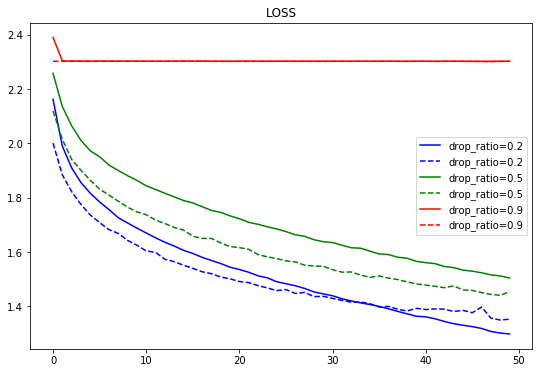

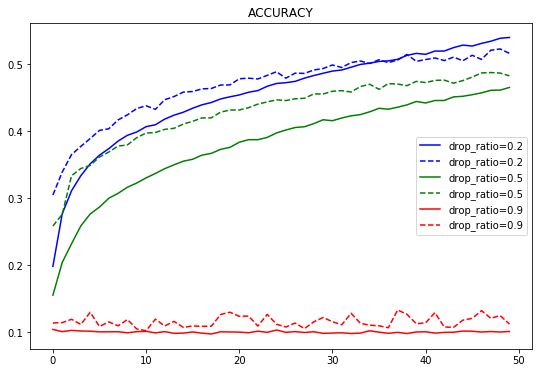

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ['b', 'g', 'r']
fig = plt.figure(figsize = (9,6))
for i,n in enumerate(results.keys()):
    plt.plot(range(len(results[n]['train-loss'])), results[n]['train-loss'], '-', label=n, color=color_bar[i])
    plt.plot(range(len(results[n]['valid-loss'])), results[n]['valid-loss'], '--', label=n, color=color_bar[i])
    plt.legend()
    plt.title("LOSS")
plt.show()

fig = plt.figure(figsize = (9,6))
for i,n in enumerate(results.keys()):
    plt.plot(range(len(results[n]['train-acc'])), results[n]['train-acc'], '-', label=n, color=color_bar[i])
    plt.plot(range(len(results[n]['valid-acc'])), results[n]['valid-acc'], '--', label=n, color=color_bar[i])
    plt.legend()
    plt.title('ACCURACY')
plt.show()


drop_ratio=0.2
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 13s 264us/step - loss: 2.0093 - accuracy: 0.2623 - val_loss: 1.7984 - val_accuracy: 0.3649
Epoch 2/50
50000/50000 [==============================] - 12s 235us/step - loss: 1.7771 - accuracy: 0.3599 - val_loss: 1.7214 - val_accuracy: 0.3810
Epoch 3/50
50000/50000 [==============================] - 14s 281us/step - loss: 1.6864 - accuracy: 0.3976 - val_loss: 1.6010 - val_accuracy: 0.4232
Epoch 4/50
50000/50000 [==============================] - 12s 249us/step - loss: 1.6146 - accuracy: 0.4259 - val_loss: 1.5304 - val_accuracy: 0.4554
Epoch 5/50
50000/50000 [==============================] - 16s 321us/step - loss: 1.5701 - accuracy: 0.4395 - val_loss: 1.5337 - val_accuracy: 0.4507
Epoch 6/50
50000/50000 [==============================] - 15s 307us/step - loss: 1.5341 - accuracy: 0.4510 - val_loss: 1.5348 - val_accuracy: 0.4550
Epoch 7/50
50000/50000 [=================

Epoch 5/50
50000/50000 [==============================] - 11s 220us/step - loss: 1.7190 - accuracy: 0.3862 - val_loss: 1.6173 - val_accuracy: 0.4235
Epoch 6/50
50000/50000 [==============================] - 12s 239us/step - loss: 1.6804 - accuracy: 0.4034 - val_loss: 1.5899 - val_accuracy: 0.4292
Epoch 7/50
50000/50000 [==============================] - 12s 237us/step - loss: 1.6392 - accuracy: 0.4159 - val_loss: 1.5756 - val_accuracy: 0.4346
Epoch 8/50
50000/50000 [==============================] - 10s 206us/step - loss: 1.6194 - accuracy: 0.4252 - val_loss: 1.5697 - val_accuracy: 0.4317
Epoch 9/50
50000/50000 [==============================] - 13s 253us/step - loss: 1.5935 - accuracy: 0.4319 - val_loss: 1.5461 - val_accuracy: 0.4467
Epoch 10/50
50000/50000 [==============================] - 14s 277us/step - loss: 1.5743 - accuracy: 0.4420 - val_loss: 1.5120 - val_accuracy: 0.4585
Epoch 11/50
50000/50000 [==============================] - 13s 267us/step - loss: 1.5610 - accuracy: 0.44

50000/50000 [==============================] - 11s 217us/step - loss: 2.3027 - accuracy: 0.0991 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 8/50
50000/50000 [==============================] - 13s 258us/step - loss: 2.3027 - accuracy: 0.0983 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 9/50
50000/50000 [==============================] - 14s 278us/step - loss: 2.3027 - accuracy: 0.0976 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 10/50
50000/50000 [==============================] - 14s 271us/step - loss: 2.3027 - accuracy: 0.0967 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 11/50
50000/50000 [==============================] - 21s 413us/step - loss: 2.3027 - accuracy: 0.0996 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 12/50
50000/50000 [==============================] - 11s 227us/step - loss: 2.3026 - accuracy: 0.0985 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 13/50
50000/50000 [==============================] - 13s 250us/step - loss: 2.3027 - accuracy: 0.0971 - val_

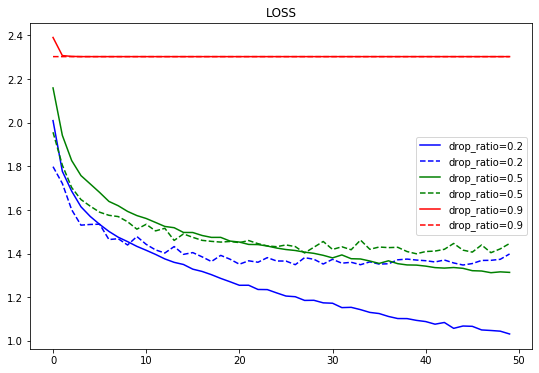

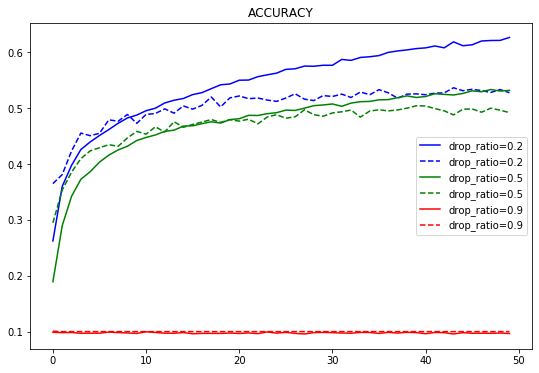

In [19]:
#Adam 

results = {}
for drop in dropout_ratio:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print('drop_ratio={}'.format(drop))
    model = build_mlp (input_shape=x_train.shape[1:], drop_rate=drop)
    optimizer = keras.optimizers.Adam(lr=learning_rate, beta_1=0.9, beta_2= 0.99, decay=0)
    model.compile (loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    
    model.fit(x_train, y_train,
             epochs=epochs,
             batch_size=batch_size,
             validation_data=(x_test,y_test),
             shuffle=True)
    
    model_name = 'drop_ratio={}'.format(drop)
    
    results[model_name]={'train-loss': model.history.history['loss'],
                             'valid-loss': model.history.history['val_loss'],
                             'train-acc': model.history.history ['accuracy'],
                             'valid-acc': model.history.history ['val_accuracy']}
    
    import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ['b', 'g', 'r']
fig = plt.figure(figsize = (9,6))
for i,n in enumerate(results.keys()):
    plt.plot(range(len(results[n]['train-loss'])), results[n]['train-loss'], '-', label=n, color=color_bar[i])
    plt.plot(range(len(results[n]['valid-loss'])), results[n]['valid-loss'], '--', label=n, color=color_bar[i])
    plt.legend()
    plt.title("LOSS")
plt.show()

fig = plt.figure(figsize = (9,6))
for i,n in enumerate(results.keys()):
    plt.plot(range(len(results[n]['train-acc'])), results[n]['train-acc'], '-', label=n, color=color_bar[i])
    plt.plot(range(len(results[n]['valid-acc'])), results[n]['valid-acc'], '--', label=n, color=color_bar[i])
    plt.legend()
    plt.title('ACCURACY')
plt.show()


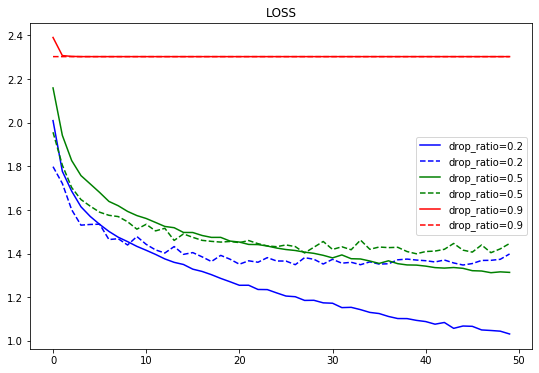

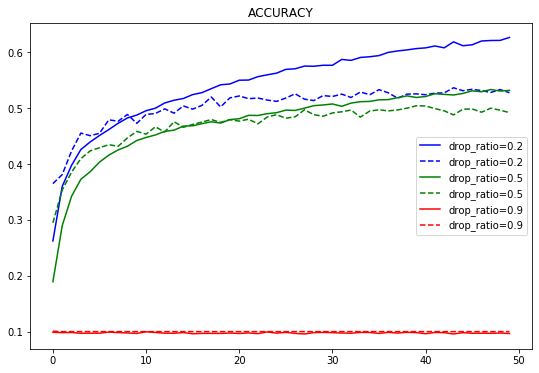

In [20]:
color_bar = ['b', 'g', 'r']
fig = plt.figure(figsize = (9,6))
for i,n in enumerate(results.keys()):
    plt.plot(range(len(results[n]['train-loss'])), results[n]['train-loss'], '-', label=n, color=color_bar[i])
    plt.plot(range(len(results[n]['valid-loss'])), results[n]['valid-loss'], '--', label=n, color=color_bar[i])
    plt.legend()
    plt.title("LOSS")
plt.show()

fig = plt.figure(figsize = (9,6))
for i,n in enumerate(results.keys()):
    plt.plot(range(len(results[n]['train-acc'])), results[n]['train-acc'], '-', label=n, color=color_bar[i])
    plt.plot(range(len(results[n]['valid-acc'])), results[n]['valid-acc'], '--', label=n, color=color_bar[i])
    plt.legend()
    plt.title('ACCURACY')
plt.show()
